# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# test kernel to API call for just one city and go from there
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units&q="

test_city = requests.get(query_url + "jamestown").json()
# pprint(test_city)

test_lat = test_city["coord"]["lat"]
test_lng = test_city["coord"]["lon"]
test_max_temp = test_city["main"]["temp_max"]
test_max_temp = test_max_temp - 273.15
test_humidity = test_city["main"]["humidity"]
test_clouds = test_city["clouds"]["all"]
test_wind = test_city["wind"]["speed"]
test_country = test_city["sys"]["country"]
test_date = test_city["dt"]

test_date_formatted = datetime.utcfromtimestamp(test_date).strftime('%Y-%m-%d %H:%M:%S UTC')

print(f"{test_lat} \n{test_lng} \n{test_max_temp} \n{test_humidity} \n{test_clouds} \n{test_wind} \n{test_country} \n{test_date_formatted}")

42.097 
-79.2353 
3.340000000000032 
92 
100 
6.69 
US 
2023-12-04 13:47:44 UTC


In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
# this will give a number to each city in the list of cities. Ex - Index 0, city name
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    # i % 50 == 0 is looking to see if i is divisible by 50 with no remainder
    # once it finds an i value where this is true, i.e. 50, then it will add 1 to the set count and reset the record_count to 0
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_max_temp = city_max_temp - 273.15
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"] #figured out later to add ["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        city_date = datetime.utcfromtimestamp(city_date).strftime('%Y-%m-%d %H:%M:%S UTC')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapuskasing
Processing Record 2 of Set 1 | kirs
Processing Record 3 of Set 1 | san patricio
Processing Record 4 of Set 1 | pskov
Processing Record 5 of Set 1 | pisco
Processing Record 6 of Set 1 | san luis
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | monterey
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | uturoa
Processing Record 12 of Set 1 | prado
Processing Record 13 of Set 1 | port lincoln
Processing Record 14 of Set 1 | wailua homesteads
Processing Record 15 of Set 1 | kyshtovka
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | tura
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | bamboo flat
Processing Rec

Processing Record 39 of Set 4 | howrah
Processing Record 40 of Set 4 | georgetown
Processing Record 41 of Set 4 | pul-e 'alam
Processing Record 42 of Set 4 | kayyerkan
Processing Record 43 of Set 4 | thompson
Processing Record 44 of Set 4 | richmond
Processing Record 45 of Set 4 | vila velha
Processing Record 46 of Set 4 | ixtapa
Processing Record 47 of Set 4 | chaiyaphum
Processing Record 48 of Set 4 | port moresby
Processing Record 49 of Set 4 | barra de santo antonio
Processing Record 0 of Set 5 | robat karim
Processing Record 1 of Set 5 | nago
Processing Record 2 of Set 5 | palmer
Processing Record 3 of Set 5 | mayya
Processing Record 4 of Set 5 | chongwe
Processing Record 5 of Set 5 | isafjordur
Processing Record 6 of Set 5 | minas de matahambre
City not found. Skipping...
Processing Record 7 of Set 5 | crane
Processing Record 8 of Set 5 | urucara
Processing Record 9 of Set 5 | polyarnyy
Processing Record 10 of Set 5 | turpan
Processing Record 11 of Set 5 | kampong thom
Processing

Processing Record 35 of Set 8 | la'ie
Processing Record 36 of Set 8 | sisimiut
Processing Record 37 of Set 8 | ouani
Processing Record 38 of Set 8 | yabelo
Processing Record 39 of Set 8 | turiacu
Processing Record 40 of Set 8 | kabansk
Processing Record 41 of Set 8 | chom bueng
Processing Record 42 of Set 8 | cold lake
Processing Record 43 of Set 8 | tazovsky
Processing Record 44 of Set 8 | anshun
Processing Record 45 of Set 8 | maasim
Processing Record 46 of Set 8 | loreto
Processing Record 47 of Set 8 | guozhen
Processing Record 48 of Set 8 | chibougamau
Processing Record 49 of Set 8 | malango
Processing Record 0 of Set 9 | coronel suarez
Processing Record 1 of Set 9 | bima
Processing Record 2 of Set 9 | petrovsk-zabaykal'skiy
Processing Record 3 of Set 9 | prince rupert
Processing Record 4 of Set 9 | vinaros
Processing Record 5 of Set 9 | laascaanood
Processing Record 6 of Set 9 | mammoth lakes
Processing Record 7 of Set 9 | zwolen
Processing Record 8 of Set 9 | klaksvik
Processing 

Processing Record 26 of Set 12 | takamaka
City not found. Skipping...
Processing Record 27 of Set 12 | banda aceh
Processing Record 28 of Set 12 | huarmey
Processing Record 29 of Set 12 | ingersoll
Processing Record 30 of Set 12 | usogorsk
Processing Record 31 of Set 12 | balfour
Processing Record 32 of Set 12 | bereket
Processing Record 33 of Set 12 | horta
Processing Record 34 of Set 12 | levuka
Processing Record 35 of Set 12 | menzelinsk
Processing Record 36 of Set 12 | andratx
Processing Record 37 of Set 12 | dnestrovsc
Processing Record 38 of Set 12 | ambon
Processing Record 39 of Set 12 | rikaze
Processing Record 40 of Set 12 | vitoria da conquista
Processing Record 41 of Set 12 | lagoa
Processing Record 42 of Set 12 | harper
Processing Record 43 of Set 12 | aleksandrovsk-sakhalinskiy
Processing Record 44 of Set 12 | cruz del eje
Processing Record 45 of Set 12 | north side
Processing Record 46 of Set 12 | mount pearl
-----------------------------
Data Retrieval Complete      
---

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())


City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64


In [6]:

# city_data_df["Max Temp"] = city_data_df["Max Temp"] - 273.15
# city_data_df.head()

In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapuskasing,49.4169,-82.4331,-20.95,77,20,2.06,CA,2023-12-04 13:49:10 UTC
1,kirs,59.3388,52.2447,-10.32,95,100,3.34,RU,2023-12-04 13:49:10 UTC
2,san patricio,28.0170,-97.5169,13.92,53,100,3.14,US,2023-12-04 13:49:10 UTC
3,pskov,57.8136,28.3496,-9.05,92,100,0.00,RU,2023-12-04 13:49:10 UTC
4,pisco,-13.7000,-76.2167,21.12,83,100,3.09,PE,2023-12-04 13:49:10 UTC


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

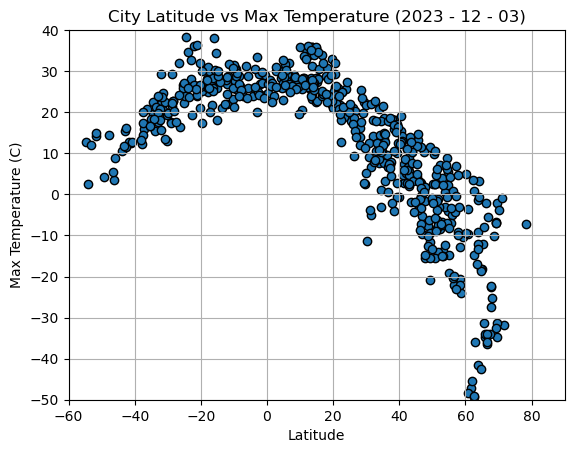

In [9]:
# Build scatter plot for latitude vs. temperature
scatter_x = city_data_df["Lat"]
scatter_y = city_data_df["Max Temp"]
plt.scatter(scatter_x, scatter_y, marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs Max Temperature (2023 - 12 - 03)")
plt.xlim(-60, 90)  # Set the x-axis limits
plt.ylim(-50, 40)  # Set the y-axis limits
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

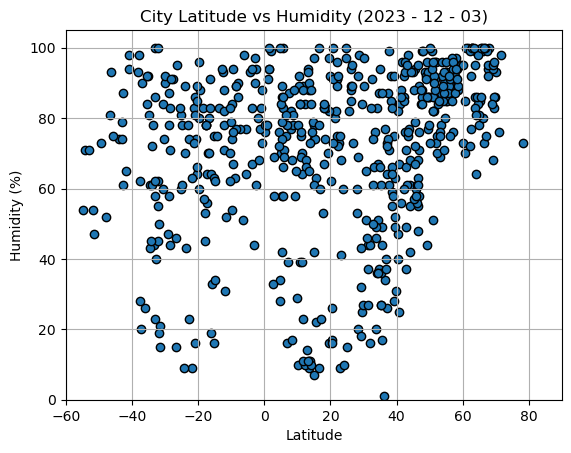

In [10]:
# Build scatter plot for latitude vs. temperature
scatter_x2 = city_data_df["Lat"]
scatter_y2 = city_data_df["Humidity"]
plt.scatter(scatter_x2, scatter_y2, marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (2023 - 12 - 03)")
plt.xlim(-60, 90)  # Set the x-axis limits
plt.ylim(0, 105)  # Set the y-axis limits
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [11]:
# # Found this on google
# # Extract the numerical value from the 'Cloudiness' column
# city_data_df['Cloudiness'] = city_data_df['Cloudiness'].apply(lambda x: x['all'] if isinstance(x, dict) and 'all' in x else x)
# # Convert Cloudiness to numeric, handle non-numeric values gracefully
# city_data_df['Cloudiness'] = pd.to_numeric(city_data_df['Cloudiness'], errors='coerce')
# # Drop rows with NaN values in the 'Cloudiness' column
# city_data_df = city_data_df.dropna(subset=['Cloudiness'])

# Scatter plot was coming out very weird so this kernel is trying to figure that out

print(city_data_df[['Lat', 'Cloudiness']])
print(city_data_df['Cloudiness'].isna().sum())
print(city_data_df.dtypes)


             Lat  Cloudiness
City_ID                     
0        49.4169          20
1        59.3388         100
2        28.0170         100
3        57.8136         100
4       -13.7000         100
...          ...         ...
571       4.3750          23
572      50.8975          99
573     -30.7264         100
574      19.3500          20
575      47.5166         100

[576 rows x 2 columns]
0
City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date           object
dtype: object


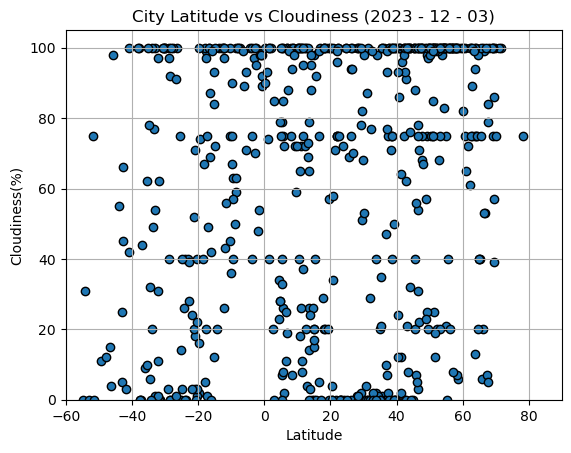

In [12]:
# Build scatter plot for latitude vs. temperature
scatter_x3 = city_data_df["Lat"]
scatter_y3 = city_data_df["Cloudiness"]
plt.scatter(scatter_x3, scatter_y3, marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs Cloudiness (2023 - 12 - 03)")
plt.xlim(-60, 90)  # Set the x-axis limits
plt.ylim(0, 105)  # Set the y-axis limits
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

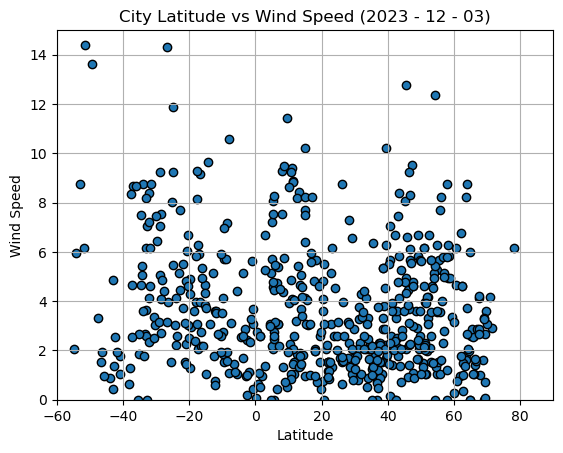

In [13]:
# Build scatter plot for latitude vs. temperature
scatter_x4 = city_data_df["Lat"]
scatter_y4 = city_data_df["Wind Speed"]
plt.scatter(scatter_x4, scatter_y4, marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Wind Speed (2023 - 12 - 03)")
plt.xlim(-60, 90)  # Set the x-axis limits
plt.ylim(0, 15)  # Set the y-axis limits
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
m, b, r_value, p_value, stderr = linregress(x_var, y-var)
lineq = m*x_var + b

NameError: name 'x_var' is not defined

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapuskasing,49.4169,-82.4331,-20.95,77,20,2.06,CA,2023-12-04 13:49:10 UTC
1,kirs,59.3388,52.2447,-10.32,95,100,3.34,RU,2023-12-04 13:49:10 UTC
2,san patricio,28.0170,-97.5169,13.92,53,100,3.14,US,2023-12-04 13:49:10 UTC
3,pskov,57.8136,28.3496,-9.05,92,100,0.00,RU,2023-12-04 13:49:10 UTC
7,iqaluit,63.7506,-68.5145,-9.15,86,75,8.23,CA,2023-12-04 13:49:11 UTC


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,pisco,-13.7000,-76.2167,21.12,83,100,3.09,PE,2023-12-04 13:49:10 UTC
5,san luis,-33.2950,-66.3356,19.53,44,77,2.68,AR,2023-12-04 13:49:00 UTC
6,port-aux-francais,-49.3500,70.2167,4.15,73,11,13.64,TF,2023-12-04 13:49:11 UTC
9,edinburgh of the seven seas,-37.0676,-12.3116,15.98,90,44,8.66,SH,2023-12-04 13:49:11 UTC
10,uturoa,-16.7333,-151.4333,26.29,80,100,9.15,PF,2023-12-04 13:49:11 UTC


###  Temperature vs. Latitude Linear Regression Plot

In [26]:
# Linear regression on Northern Hemisphere
x_var = northern_hemi_df["Lat"]
y_var = northern_hemi_df["Max Temp"]
m, b, r_value, p_value, stderr = linregress(x_var, y_var)
lineq = m*x_var + b
print(f"The linear regression equation for Temperature vs. Latitude in the Northern Hemisphere is y = {round(m, 2)}*x + {round(b, 2)}")
print(r_value)

The linear regression equation for Temperature vs. Latitude in the Northern Hemisphere is y = -0.81*x + 37.72
-0.8700030952879758


In [27]:
# Linear regression on Southern Hemisphere
x_var = southern_hemi_df["Lat"]
y_var = southern_hemi_df["Max Temp"]
m, b, r_value, p_value, stderr = linregress(x_var, y_var)
lineq = m*x_var + b
print(f"The linear regression equation for Temperature vs. Latitude in the Southern Hemisphere is y = {round(m, 2)}*x + {round(b, 2)}")
print(r_value)

The linear regression equation for Temperature vs. Latitude in the Southern Hemisphere is y = 0.37*x + 31.44
0.7223423373234116


**Discussion about the linear relationship:** 
In the northern hemisphere, there is a strong negative correlation (-0.87) between latitude and temperature, meaning that it is reasonable to say that the further north you get from the equator, the colder it is. The slope of the linear regression equation is -0.81, which can be interpreted as: The average max temperature decreases by 0.81 degrees for each degree that you move north above the equation.

In the southern hemisphere, there is a decently strong positive correlation (0.72) between latitude and temperature, meaning one can say that the closer you get to the equation from the south, the warmer it is. The slope of the linear regression equation is 0.37, which can be interpreted as: The average max temperature increases by 0.37 degrees for each degree that you move north starting at -90 degrees latitude.


### Humidity vs. Latitude Linear Regression Plot

In [28]:
# Northern Hemisphere
x_var = northern_hemi_df["Lat"]
y_var = northern_hemi_df["Humidity"]
m, b, r_value, p_value, stderr = linregress(x_var, y_var)
lineq = m*x_var + b
print(f"The linear regression equation for Humidity vs. Latitude in the Northern Hemisphere is y = {round(m, 2)}*x + {round(b, 2)}")
print(r_value)

The linear regression equation for Humidity vs. Latitude in the Northern Hemisphere is y = 0.42*x + 57.1
0.34012334410132095


In [29]:
# Southern Hemisphere
x_var = southern_hemi_df["Lat"]
y_var = southern_hemi_df["Humidity"]
m, b, r_value, p_value, stderr = linregress(x_var, y_var)
lineq = m*x_var + b
print(f"The linear regression equation for Humidity vs. Latitude in the Southern Hemisphere is y = {round(m, 2)}*x + {round(b, 2)}")
print(r_value)

The linear regression equation for Humidity vs. Latitude in the Southern Hemisphere is y = 0.24*x + 74.2
0.14849159031651402


**Discussion about the linear relationship:** 
Based on the linear regression of Humidity vs Latitude, there is a weak correlation between humidity and latitude in the northern hemisphere and a very weak correlation in the southern hemisphere. It would not be reasonable to use these linear regressions to make predictions about humidity levels based on latitude.

### Cloudiness vs. Latitude Linear Regression Plot

In [30]:
# Northern Hemisphere
x_var = northern_hemi_df["Lat"]
y_var = northern_hemi_df["Cloudiness"]
m, b, r_value, p_value, stderr = linregress(x_var, y_var)
lineq = m*x_var + b
print(f"The linear regression equation for Cloudiness vs. Latitude in the Northern Hemisphere is y = {round(m, 2)}*x + {round(b, 2)}")
print(r_value)

The linear regression equation for Cloudiness vs. Latitude in the Northern Hemisphere is y = 0.37*x + 49.35
0.1819393578311031


In [31]:
# Southern Hemisphere
x_var = southern_hemi_df["Lat"]
y_var = southern_hemi_df["Cloudiness"]
m, b, r_value, p_value, stderr = linregress(x_var, y_var)
lineq = m*x_var + b
print(f"The linear regression equation for Cloudiness vs. Latitude in the Southern Hemisphere is y = {round(m, 2)}*x + {round(b, 2)}")
print(r_value)

The linear regression equation for Cloudiness vs. Latitude in the Southern Hemisphere is y = 1.2*x + 80.98
0.4069831394018247


**Discussion about the linear relationship:** 
Based on the linear regression of Cloudiness vs Latitude, there is a weak correlation between cloudiness and latitude in the southern hemisphere and a very weak correlation in the northern hemisphere. It would not be reasonable to use these linear regressions to make predictions about cloudiness based on latitude.

### Wind Speed vs. Latitude Linear Regression Plot

In [32]:
# Northern Hemisphere
x_var = northern_hemi_df["Lat"]
y_var = northern_hemi_df["Wind Speed"]
m, b, r_value, p_value, stderr = linregress(x_var, y_var)
lineq = m*x_var + b
print(f"The linear regression equation for Wind Speed vs. Latitude in the Northern Hemisphere is y = {round(m, 2)}*x + {round(b, 2)}")
print(r_value)

The linear regression equation for Wind Speed vs. Latitude in the Northern Hemisphere is y = -0.01*x + 3.68
-0.05168354861907162


In [33]:
# Southern Hemisphere
x_var = southern_hemi_df["Lat"]
y_var = southern_hemi_df["Wind Speed"]
m, b, r_value, p_value, stderr = linregress(x_var, y_var)
lineq = m*x_var + b
print(f"The linear regression equation for Wind Speed vs. Latitude in the Southern Hemisphere is y = {round(m, 2)}*x + {round(b, 2)}")
print(r_value)

The linear regression equation for Wind Speed vs. Latitude in the Southern Hemisphere is y = -0.04*x + 3.17
-0.2097819102494564


**Discussion about the linear relationship:** 
Based on the linear regression of Wind Speed vs Latitude, there is a very weak correlation between Wind Speed and Latitude in both hemispheres. It would not be reasonable to use these linear regressions to make predictions about wind speed based on latitude.